In [53]:
#第1题
def Print_values(a,b,c):
    if a>b:
        if b>c:
            print(a+b-10*c)
        else:
            if a>c:
                print(a+c-10*b)
            else:
                print(c+a-10*b)
    else:
        if b>c:
            #这块题目没有说输出什么，我自己按照大小顺序加的
            if c>a:
                print(b+c-10*a)
            else:
                print(b+a-10*c)
        else:
            print(c+b-10*a)
        
        
Print_values(10,20,50)        


-30


In [103]:
#第2题
import math
#建立一个输出值函数
def continueceil(a):
    if a!=1:
        return  continueceil(math.ceil(a/3))+2*a
    else:
        return 1
continueceil(11)



35

In [105]:
#第2题，从网上了解ceil函数和log函数
import math
#建立一个输出值函数
def continueceil(a):
    if a!=1:
        b=math.ceil(math.log(a,3))                   #确定需要除以3的次数，取整
        c = 2*a                                      #第一个尾数2x
        d=a
        for i in range(b-1):                         #得到后面的尾数，循环b-1次
            d = math.ceil(d/3)
            c=c+2*d                                  #加上
        return c+1                                   #最后加上f（1）     
    else:
        return 1
list1=[1,2,3,4,5,6,32,56,87,65]                      #随便创建一个list
list2=[]                                             #输出值list
for i in list1:
    list2.append( continueceil(i))
print(list2)                                        #输出

[1, 5, 7, 13, 15, 17, 99, 171, 265, 197]


In [ ]:
#第3题


[7.0, 19.5, 39.666666666666664, 112.5, 210.8, 325.5, 417.2857142857143, 1051.875, 2214.3333333333335]


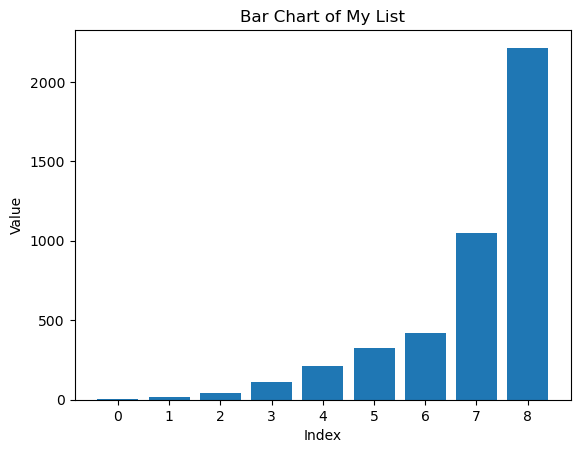

In [25]:
#第4题
#4.1
import random
def Random_integer(N):
    list1=[]               #创建空list
    for i in range(N):
        list1.append(random.randint(0,10))
    return list1
#4.2
import itertools
def Sum_averages(list_a):
    N = len(list_a)                #长度为N的list_a
    sum_mean = 0                       #所有子集的均值的和
    for i in range(1,N+1):           
        combins = [c for c in itertools.combinations(list_a,i)]       #从list——a里组合抽样，并形成一个组合list。组合的方式从网上查询的
      #  print(combins)                                               #打印出具体的组合
        mean_i_c = 0                                                         #i个元素的子集 的和
        for x in range(len(combins)):
            for y in range(i):
                mean_i_c = mean_i_c+combins[x][y]
        mean_i = mean_i_c/i                                                 #i个元素的子集 的均值   
        sum_mean =sum_mean+mean_i         
    return sum_mean
#4.3
import matplotlib.pyplot as plt
Total_sum_averages= []
for N in range(1,10):
    list_a = Random_integer(N)
    mean_a = Sum_averages(list_a)
    Total_sum_averages.append(mean_a)
    #print(list_a)
    #print(mean_a)
print(Total_sum_averages)
#plot画图方法从网上查找
# 创建 x 轴数据
x_values = range(len(Total_sum_averages))

# 绘制柱状图
plt.bar(x_values, Total_sum_averages)
plt.title('Bar Chart of My List')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(x_values)  # 设置 x 轴刻度
plt.show()

In [ ]:
#第5题
#5.1,
import numpy as np
def make_matrix(N,M):
    rows = N
    cols = M
    matrix = np.zeros((rows, cols))  # 先生成一个零矩阵,矩阵生成方法从网上查询
    # 填充特定的值
    for i in range(rows):
        for j in range(cols):
            matrix[i][j] =np.random.choice([0, 1])             #0或1的随机数生成方法从网上查询
    matrix[0][0]=1
    matrix[N-1][M-1]=1
    #print(matrix)
    return matrix
#5.2
#（1）先判断总共有多少条路可以走（不考虑障碍）
#向右走代表1，向下走代表2，每个list代表一条path
#N行M列的矩阵一共有M-1次1，N-1次2.
import itertools
def paths(N,M):
    path_list = [1]*(M-1)+[2]*(N-1)
    Total_path_0=set(itertools.permutations(path_list))         #M+N-2个数，N-1个1的排列数
    Total_path = list(Total_path_0) 
    c = len(Total_path)
    #print(Total_path)
    #print(c)
    return Total_path
#(2)如果这条path可以通过，则这条路径上的值之和=N+M-2(不包括起点)，如果小于则不通过。
def judge_path(m,p,N,M):         #m代表矩阵，p代表这条path的list,
    r=0                          #起始的坐标
    c=0
    sum = 0                      #和
    for i in p:                  
        if i == 1:                 #i=1,向右走
            c=c+1
            sum=sum+m[r][c]
        else:                     #i = 2，向下走
            r=r+1
            sum=sum+m[r][c]
    if sum == r+c:               #判断这条路径的点的和（不包括起点）
        #print(p)
        return True
    else:
        return False
    
def Count_path(N,M):
    A = make_matrix(N,M)
    n_path = paths(N,M)
    n = 0
    for i in n_path:
        if judge_path(A,i,N,M)==True:
            n = n+1
        else:
            n=n
    #print(n)
    return n    

#5.3
count = []
for i in range(1000):
    count.append(Count_path(10,8))
print( count)
print(sum(count)/1000) 
